# Fil Rouge - Deep Learning

Élèves : Yann BRUNO, José CARVALHO, Lucas WITZEL

Tout d'abord, on importe les bibliothèques que l'on utilise tout au long du code

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from keras.datasets import imdb

Ensuite, on télécharge le dataset déjà disponible dans la bibliothèque keras.

In [ ]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=20000)

Division des sets de formation, de test et de validation :

In [3]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")


x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Fonction créée pour vectoriser les chaînes de caractères, et ainsi créer une liste de mots qui apparaissent ou non, étant 0 ou 1.

La deuxième fonction sert à créer les modèles contenant des couches ayant des caractéristiques différentes en fonction des paramètres transmis.




In [12]:
def vectorize_sequences(sequences, dimension=20000):
     """
     Creates lists with zeros and ones, what represents if
     a word is found or not.

     Parameters
     ----------
     sequences : list int (words encoded in numbers)
     dimension : int (list dimension)

     Returns
     -------
     results : numpy array
     """

    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1
    return results

def createmodels_c(num_layers):
     """
     Function that creates the models that will 
     later be used to make predictions.

     Parameters
     ----------
     num_layers : int (number of layers of the model)

     Returns
     -------
     model : model type 
     """

  model = Sequential()

  for n in range(num_layers):
    model.add(layers.Dense(units=16,activation='relu'))
  
  model.add(layers.Dense(units=1,name='Output',activation = 'sigmoid'))

  model.compile(optimizer="rmsprop",
                loss="binary_crossentropy",
                metrics=["accuracy"])

  return model

# Nombre de Neurones



Dans cette partie du code, nous analysons l'influence du nombre de neurones dans le réseau neuronal.

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

history = model.fit(partial_x_train,
    partial_y_train,
    epochs=15,
    batch_size=512,
    validation_data=(x_val, y_val),
)

loss, accuracy = model.evaluate(x_val, y_val)

Epoch 1/15
30/30 [==============================] - 2s 61ms/step - loss: 0.5353 - accuracy: 0.7767 - val_loss: 0.3964 - val_accuracy: 0.8723
Epoch 2/15
30/30 [==============================] - 1s 27ms/step - loss: 0.3180 - accuracy: 0.8996 - val_loss: 0.3073 - val_accuracy: 0.8894
Epoch 3/15
30/30 [==============================] - 1s 26ms/step - loss: 0.2295 - accuracy: 0.9303 - val_loss: 0.2763 - val_accuracy: 0.8933
Epoch 4/15
30/30 [==============================] - 1s 26ms/step - loss: 0.1820 - accuracy: 0.9443 - val_loss: 0.2704 - val_accuracy: 0.8925
Epoch 5/15
30/30 [==============================] - 1s 25ms/step - loss: 0.1396 - accuracy: 0.9613 - val_loss: 0.2903 - val_accuracy: 0.8852
Epoch 6/15
30/30 [==============================] - 1s 25ms/step - loss: 0.1148 - accuracy: 0.9674 - val_loss: 0.2792 - val_accuracy: 0.8897
Epoch 7/15
30/30 [==============================] - 1s 27ms/step - loss: 0.0932 - accuracy: 0.9755 - val_loss: 0.3124 - val_accuracy: 0.8809
Epoch 8/15
30

### Test du nombre de neurones sur l'entrée (input)

In [6]:
liste = []
liste2 = []
for i in range(0,4,1):
    
    print(f"--------------------------------- Avec {16 + 4*i} neurons dans l'entrée ---------------------------------")
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(16 + 2*i, activation="relu"),
        tf.keras.layers.Dense(16, activation="relu"),
        tf.keras.layers.Dense(1, activation="sigmoid")
    ])

    model.compile(optimizer="rmsprop",
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )

    history = model.fit(partial_x_train,
        partial_y_train,
        epochs=20,
        batch_size=512,
        validation_data=(x_val, y_val),
        verbose=0
    )
    
    loss, accuracy = model.evaluate(x_val, y_val)
    print(loss)
    print(accuracy)
    liste.append(accuracy)
    liste2.append(loss)

--------------------------------- Avec 16 neurons dans l'entrée ---------------------------------
313/313 [==============================] - 0s 1ms/step - loss: 0.5538 - accuracy: 0.8753
0.5538454651832581
0.8752999901771545
--------------------------------- Avec 20 neurons dans l'entrée ---------------------------------
313/313 [==============================] - 0s 1ms/step - loss: 0.5698 - accuracy: 0.8770
0.5698063969612122
0.8769999742507935
--------------------------------- Avec 24 neurons dans l'entrée ---------------------------------
313/313 [==============================] - 0s 1ms/step - loss: 0.5857 - accuracy: 0.8678
0.5856975317001343
0.8677999973297119
--------------------------------- Avec 28 neurons dans l'entrée ---------------------------------
313/313 [==============================] - 0s 1ms/step - loss: 0.6884 - accuracy: 0.8617
0.6884015202522278
0.8616999983787537


Affichage des résultats :

[0.5538454651832581, 0.5698063969612122, 0.5856975317001343, 0.6884015202522278]


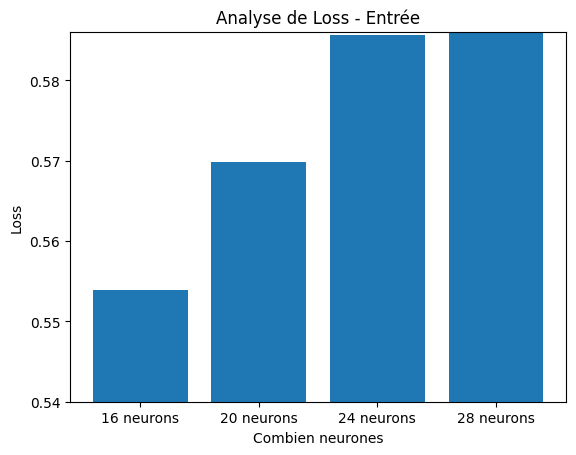

In [7]:
print(liste2)
categorias = ['16 neurons', '20 neurons', '24 neurons', '28 neurons']
valores = liste2
fig, ax = plt.subplots()
ax.bar(categorias, valores)
ax.set_xlabel('Combien neurones')
ax.set_ylabel('Loss')
ax.set_title('Analyse de Loss - Entrée')
ax.set_ylim(0.54, 0.586)
plt.show()

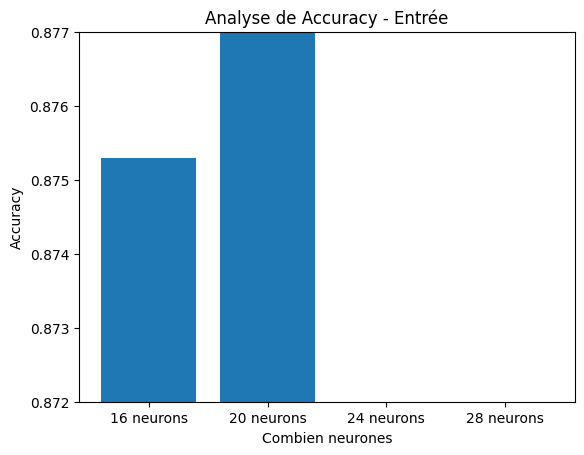

In [8]:
categorias = ['16 neurons', '20 neurons', '24 neurons', '28 neurons']
valores = liste
fig, ax = plt.subplots()
ax.bar(categorias, valores)
ax.set_xlabel('Combien neurones')
ax.set_ylabel('Accuracy')
ax.set_title('Analyse de Accuracy - Entrée')
ax.set_ylim(0.872, 0.877)
plt.show()

### Test du nombre de neurones sur les couches cachées (hidden layers)

Affichage des résultats :

In [9]:
liste = []
liste2 = []
for i in range(0,4,1):
    print(f"------------------------------------- Avec {16+4*i} neurons dans Hidden Layer -------------------------------------")
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(16, activation="relu"),
        tf.keras.layers.Dense(16+4*i, activation="relu"),
        tf.keras.layers.Dense(1, activation="sigmoid")
    ])

    model.compile(optimizer="rmsprop",
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )

    history = model.fit(partial_x_train,
        partial_y_train,
        epochs=20,
        batch_size=512,
        validation_data=(x_val, y_val),
        verbose=0
    )
    
    loss, accuracy = model.evaluate(x_val, y_val)
    
    liste.append(accuracy)
    liste2.append(loss)

------------------------------------- Avec 16 neurons dans Hidden Layer -------------------------------------
313/313 [==============================] - 0s 1ms/step - loss: 0.5556 - accuracy: 0.8763
------------------------------------- Avec 20 neurons dans Hidden Layer -------------------------------------
313/313 [==============================] - 0s 1ms/step - loss: 0.5876 - accuracy: 0.8733
------------------------------------- Avec 24 neurons dans Hidden Layer -------------------------------------
313/313 [==============================] - 1s 2ms/step - loss: 0.5908 - accuracy: 0.8749
------------------------------------- Avec 28 neurons dans Hidden Layer -------------------------------------
313/313 [==============================] - 0s 1ms/step - loss: 0.5923 - accuracy: 0.8759


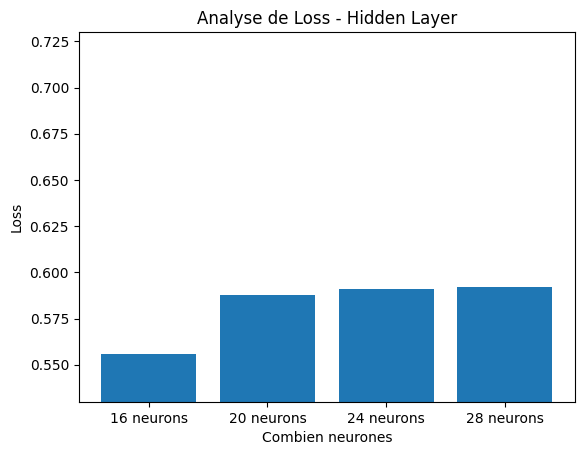

In [10]:
categorias = ['16 neurons', '20 neurons', '24 neurons', '28 neurons']
valores = liste2
fig, ax = plt.subplots()
ax.bar(categorias, valores)
ax.set_xlabel('Combien neurones')
ax.set_ylabel('Loss')
ax.set_title('Analyse de Loss - Hidden Layer')
ax.set_ylim(0.53, 0.73)
plt.show()

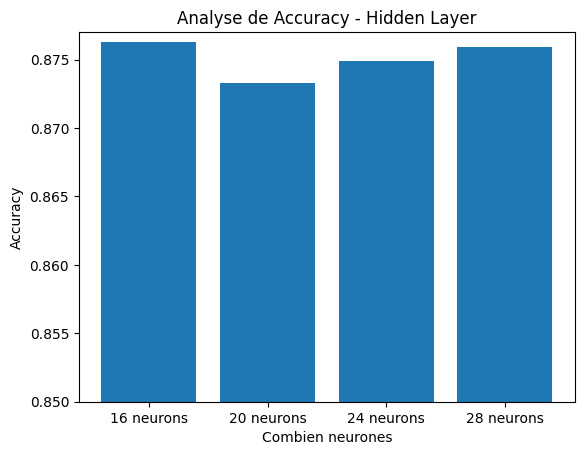

In [11]:
categorias = ['16 neurons','20 neurons', '24 neurons', '28 neurons']
valores = liste
fig, ax = plt.subplots()
ax.bar(categorias, valores)
ax.set_xlabel('Combien neurones')
ax.set_ylabel('Accuracy')
ax.set_title('Analyse de Accuracy - Hidden Layer')
ax.set_ylim(0.85, 0.877)
plt.show()

# Couches cachées (Hidden Layers)

Créer 5 modèles, un avec une couche, un autre avec deux couches, et ainsi de suite jusqu'à ce que le 5ème modèle ait 5 couches cachées.

In [15]:
models = [createmodels_c(i+1) for i in range(5)]

Entraînez les 5 modèles et enregistrez les valeurs de chaque saison pour une analyse ultérieure.

In [16]:
history = []
for i,model in enumerate(models):
  print(f"Model with {i+1} hidden layers")
  temp = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
  history.append(temp)

Model with 1 hidden layers
Epoch 1/20
30/30 [==============================] - 2s 55ms/step - loss: 0.4980 - accuracy: 0.7942 - val_loss: 0.3896 - val_accuracy: 0.8670
Epoch 2/20
30/30 [==============================] - 1s 27ms/step - loss: 0.3151 - accuracy: 0.9041 - val_loss: 0.3171 - val_accuracy: 0.8865
Epoch 3/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2442 - accuracy: 0.9251 - val_loss: 0.2884 - val_accuracy: 0.8888
Epoch 4/20
30/30 [==============================] - 1s 29ms/step - loss: 0.2006 - accuracy: 0.9405 - val_loss: 0.2967 - val_accuracy: 0.8799
Epoch 5/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1715 - accuracy: 0.9493 - val_loss: 0.2707 - val_accuracy: 0.8922
Epoch 6/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1478 - accuracy: 0.9585 - val_loss: 0.2724 - val_accuracy: 0.8918
Epoch 7/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1290 - accuracy: 0.9645 - val_loss: 0.2795 - val_acc

On garde les valeurs spécifiques dans des vecteurs afin de pouvoir les représenter sur les graphiques. Ici, on montre l'évolution pour les nombres différents de couches du perdre des ensembles d'entrainement et validation.

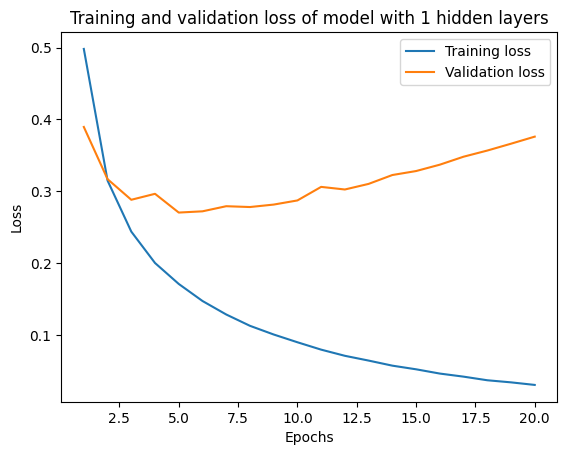

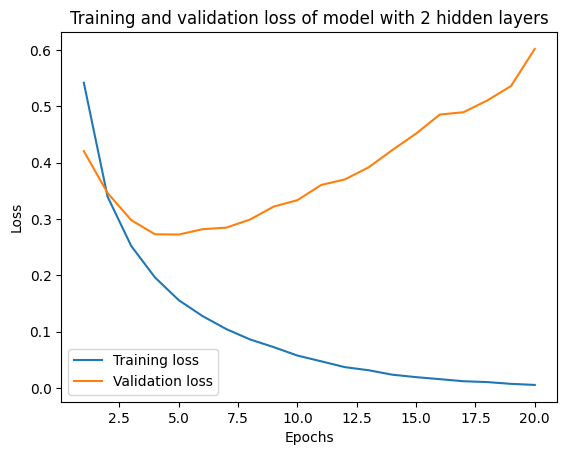

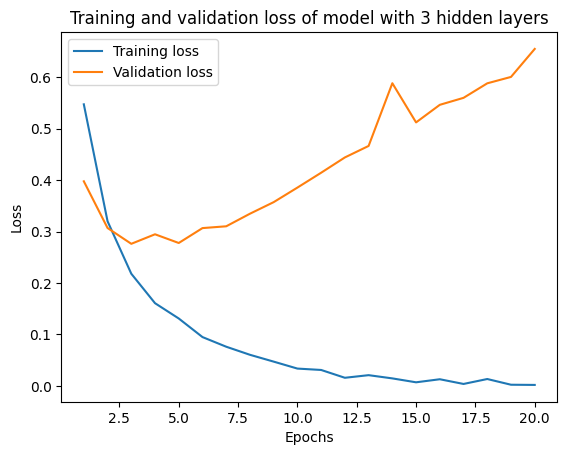

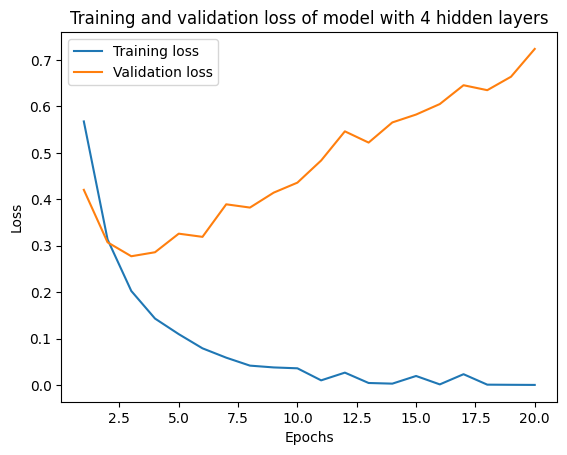

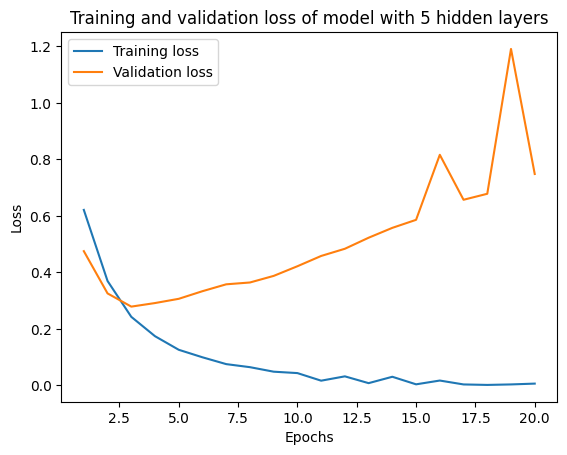

In [17]:
for n in range(5):
  history_dict = history[n].history
  loss_values = history_dict["loss"]
  val_loss_values = history_dict["val_loss"]
  epochs = range(1, len(loss_values) + 1)
  plt.plot(epochs, loss_values, label="Training loss")
  plt.plot(epochs, val_loss_values ,label="Validation loss")
  plt.title("Training and validation loss of model with " + str(n+1) +' hidden layers')
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend()
  plt.show()

Ici, on fait la même comparison mais pour la précision du model.

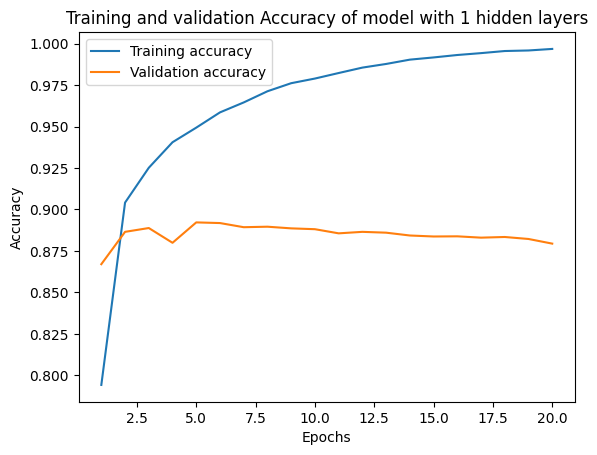

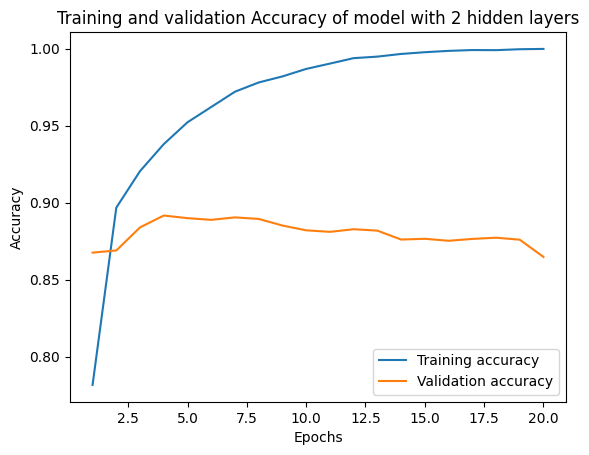

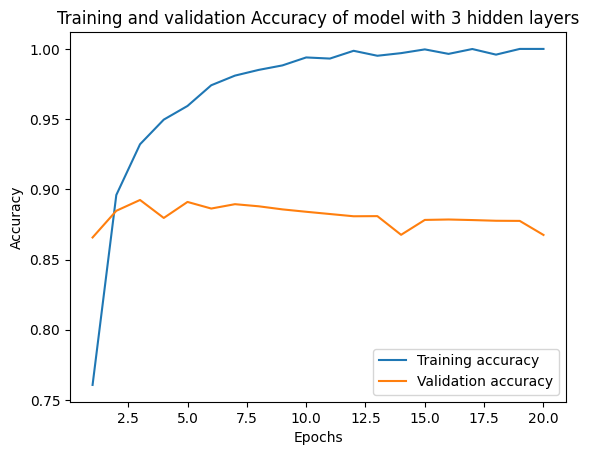

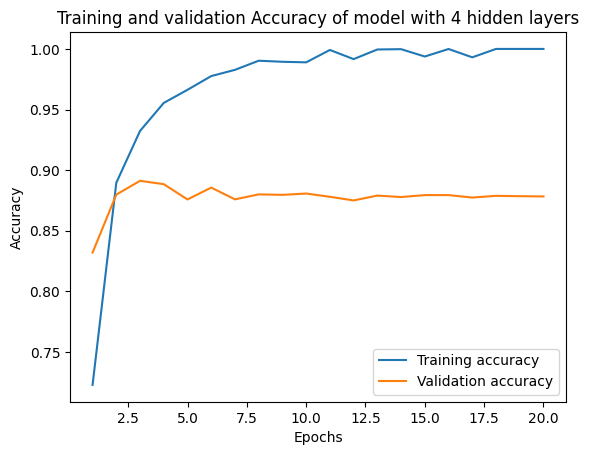

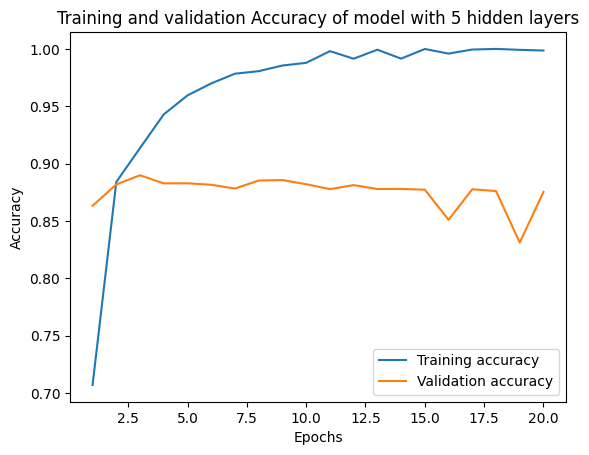

In [18]:
for n in range(5):
  history_dict = history[n].history
  acc_values = history_dict["accuracy"]
  val_acc_values = history_dict["val_accuracy"]
  epochs = range(1, len(loss_values) + 1)
  plt.plot(epochs, acc_values, label="Training accuracy")
  plt.plot(epochs, val_acc_values, label="Validation accuracy")
  plt.title("Training and validation Accuracy of model with " + str(n+1) +' hidden layers')
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.legend()
  plt.show()

On affiche ici un résumé des valeurs :

In [19]:
for n in range(5):
  print(f"------------------------------")
  print(f"Model with {n+1} hidden layers")
  test_loss, test_acc = models[n].evaluate(x_test, y_test, verbose=0)
  print('Test loss:', test_loss)
  print('Test accuracy:', test_acc)  

------------------------------
Model with 1 hidden layers
Test loss: 0.4040762782096863
Test accuracy: 0.8694400191307068
------------------------------
Model with 2 hidden layers
Test loss: 0.6734622716903687
Test accuracy: 0.8529599905014038
------------------------------
Model with 3 hidden layers
Test loss: 0.7367264628410339
Test accuracy: 0.8547599911689758
------------------------------
Model with 4 hidden layers
Test loss: 0.7699709534645081
Test accuracy: 0.8644800186157227
------------------------------
Model with 5 hidden layers
Test loss: 0.805941104888916
Test accuracy: 0.8638799786567688


Pour finir, des gráphiques qui comparent individuelment les précisions et les pertes des ensembles d'entraînement et validation de 1 a 5 nombre de couches cachees.

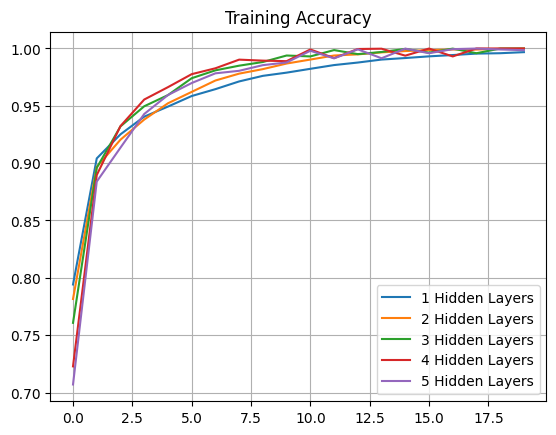

In [20]:
fig, ax = plt.subplots()
for i in range(5):
        plt.plot(np.array(history[i].history["accuracy"]),label = str(i+1)+" Hidden Layers")
ax.grid()
plt.title("Training Accuracy")
plt.legend()
plt.show()

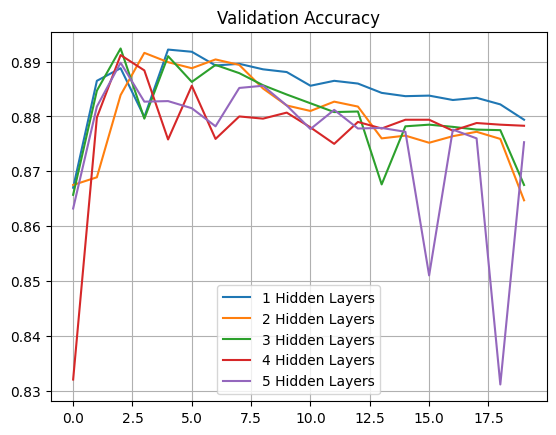

In [21]:
fig, ax = plt.subplots()
for i in range(5):
        plt.plot(np.array(history[i].history["val_accuracy"]),label = str(i+1)+" Hidden Layers")
ax.grid()
plt.title("Validation Accuracy")
plt.legend()
plt.show()

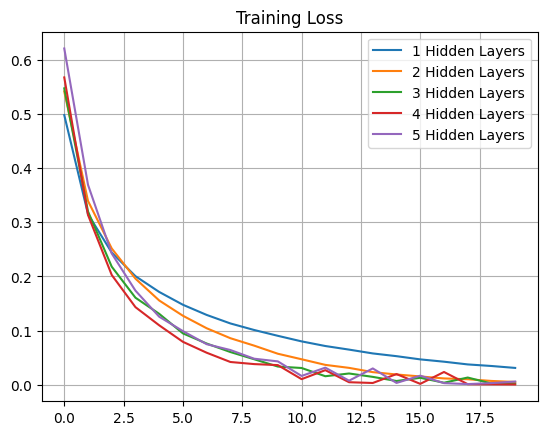

In [22]:
fig, ax = plt.subplots()
for i in range(5):
        plt.plot(np.array(history[i].history["loss"]),label = str(i+1)+" Hidden Layers")
ax.grid()
plt.title("Training Loss")
plt.legend()
plt.show()

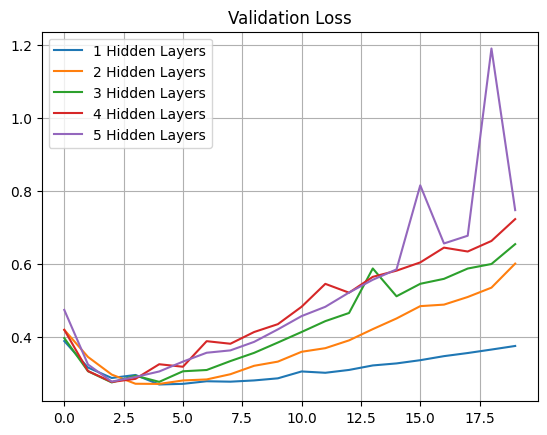

In [23]:
fig, ax = plt.subplots()
for i in range(5):
        plt.plot(np.array(history[i].history["val_loss"]),label = str(i+1)+" Hidden Layers")
ax.grid()
plt.title("Validation Loss")
plt.legend()
plt.show()